<Center><H1>Payment Date Prediction<H1><Center>

In [1]:

import numpy as  np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing Dataset
dataset=pd.read_csv("dataset.csv")
dataset.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,1.0,NaN,22225.84,20190924.0,CA10,2.960581e+09,0
6,U001,0200769623,WAL-MAR in,2019-11-12 00:00:00,2019.0,1.930083e+09,2019-11-01,20191031,20191101,20191116.0,USD,RV,1.0,NaN,7358.49,20191101.0,NAH4,1.930083e+09,0
7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1
8,U001,0200769623,WAL-MAR corp,2019-06-18 00:00:00,2019.0,1.929440e+09,2019-06-07,20190605,20190607,20190622.0,USD,RV,1.0,NaN,15995.04,20190607.0,NAH4,1.929440e+09,0
9,U001,0200762301,C&S WH systems,2019-03-06 00:00:00,2019.0,1.928819e+09,2019-02-20,20190219,20190220,20190307.0,USD,RV,1.0,NaN,28.63,20190220.0,NAC6,1.928819e+09,0


In [3]:
#Checking the null values in my dataset Columns
dataset.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [4]:
#Checking whether all the column doc_id and in
col_is_equal=dataset['doc_id'].equals(dataset['invoice_id'])
print("Columns are equal:",col_is_equal)

Columns are equal: False


In [5]:
#calculating number of matching values

matching_values=dataset['doc_id'].eq(dataset['invoice_id']).sum()
print("Number of matching values:",matching_values)

total_elements=len(dataset)
#percentage
matching_percentage=(matching_values/total_elements)*100
print("Matching Percent:{:.2f}%".format(matching_percentage))

Number of matching values: 49994
Matching Percent:99.99%


In [6]:
dataset.nunique()

business_code                 6
cust_number                1425
name_customer              4197
clear_date                  403
buisness_year                 2
doc_id                    48839
posting_date                506
document_create_date        507
document_create_date.1      506
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44349
baseline_create_date        506
cust_payment_terms           74
invoice_id                48833
isOpen                        2
dtype: int64

<h4>-> As area business Column has all null values so we can drop that column<br>
    ->AS Doc id and invoice id are 99.99 percent same so we can drop that too<br>
    ->as is openid column and posting id has constant value so we can drop that too<br>
    ->we can drop document type column to as it irrelevant column
 <h4>

In [7]:
dataset.drop(columns=['area_business','posting_id','doc_id','buisness_year','isOpen','document type','invoice_id'],inplace=True)

In [8]:
dataset .shape

(50000, 12)

In [9]:
dataset.describe()

,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date
count,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04
mean,2.019351e+07,2.019354e+07,2.019368e+07,32337.021651,2.019354e+07
std,4.496041e+03,4.482134e+03,4.470614e+03,39205.975231,4.482701e+03
min,2.018123e+07,2.018123e+07,2.018122e+07,0.720000,2.018121e+07
25%,2.019050e+07,2.019051e+07,2.019052e+07,4928.312500,2.019050e+07
50%,2.019091e+07,2.019091e+07,2.019093e+07,17609.010000,2.019091e+07
75%,2.020013e+07,2.020013e+07,2.020022e+07,47133.635000,2.020013e+07
max,2.020052e+07,2.020052e+07,2.020071e+07,668593.360000,2.020052e+07


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   posting_date            50000 non-null  object 
 5   document_create_date    50000 non-null  int64  
 6   document_create_date.1  50000 non-null  int64  
 7   due_in_date             50000 non-null  float64
 8   invoice_currency        50000 non-null  object 
 9   total_open_amount       50000 non-null  float64
 10  baseline_create_date    50000 non-null  float64
 11  cust_payment_terms      50000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 4.6+ MB


In [11]:
dataset.isna()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,True,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
dataset.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
dtype: int64

In [13]:
percentage_null=(dataset.isnull().sum()/len(dataset))*100
percentage_null

business_code              0.0
cust_number                0.0
name_customer              0.0
clear_date                20.0
posting_date               0.0
document_create_date       0.0
document_create_date.1     0.0
due_in_date                0.0
invoice_currency           0.0
total_open_amount          0.0
baseline_create_date       0.0
cust_payment_terms         0.0
dtype: float64

In [14]:
dataset['clear_date'] = pd.to_datetime(dataset['clear_date'])
dataset.sort_values(by='clear_date',ascending=False,inplace=True)

In [15]:
from sklearn.model_selection import train_test_split
train_dataset,untouched = train_test_split(dataset,test_size=0.2,shuffle=False)

In [16]:
print(train_dataset.select_dtypes(include='object').columns)

Index(['business_code', 'cust_number', 'name_customer', 'posting_date',
       'invoice_currency', 'cust_payment_terms'],
      dtype='object')


In [17]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
def preprocess_data(dataframe):
    date_columns = ['document_create_date','document_create_date.1','due_in_date','baseline_create_date']
    for col in date_columns:
        dataframe[col] = pd.to_datetime(dataframe[col],format = '%Y%m%d')

    conversion_rate = 0.76
    dataframe.loc[dataframe['invoice_currency'] == 'CAD', 'total_open_amount'] *= conversion_rate
    dataframe.loc[dataframe['invoice_currency'] == 'CAD', 'invoice_currency'] = 'USD'
        
    dataframe.drop(columns=['invoice_currency'],inplace=True)
    categorical_columns = ['business_code','cust_payment_terms','name_customer','cust_number']
    
    for column in categorical_columns:
        le = LabelEncoder()
        dataframe[column] = le.fit_transform(dataframe[column])
 

    numeric_columns = ['total_open_amount']
    # sc = StandardScaler()
    # dataframe[numeric_columns] = sc.fit_transform(dataframe[numeric_columns])
    dataframe[numeric_columns] = np.log1p(dataframe[numeric_columns])


    return dataframe


In [18]:
train_dataset = preprocess_data(train_dataset)

In [19]:
train_dataset['delay_days'] = (train_dataset['clear_date'] - train_dataset['due_in_date']).dt.days

In [20]:
train_dataset.head(6)

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
30418,1,1165,3649,2020-05-22,2020-01-14,2020-01-14,2020-01-14,2020-01-29,7.284272,2020-01-14,21,114
48219,1,448,79,2020-05-22,2020-02-14,2020-02-13,2020-02-14,2020-02-29,11.224935,2020-02-14,21,83
26143,1,751,395,2020-05-21,2020-01-18,2020-01-21,2020-01-18,2020-02-02,4.518849,2020-01-18,21,109
48581,1,751,400,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.031582,2020-01-08,21,119
14675,1,751,397,2020-05-21,2020-01-08,2020-01-09,2020-01-08,2020-01-23,5.659552,2020-01-08,21,119
5521,1,751,403,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.476996,2020-01-08,21,119


In [21]:
average_delay =train_dataset.groupby('name_customer')['delay_days'].mean()
average_delay_seconds = average_delay * 24 * 60 * 60
train_dataset['Average_Delay_Seconds'] = train_dataset['name_customer'].map(average_delay_seconds)

In [22]:
currency_counts=dataset["invoice_currency"].value_counts()
currency_counts 

USD    46081
CAD     3919
Name: invoice_currency, dtype: int64

In [23]:

dataset.head(10)



,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
30418,U001,200571849,US associates,2020-05-22,2020-01-14,20200114,20200114,20200129.0,USD,1456.20,20200114.0,NAA8
48219,U001,0200014556,ALBER corporation,2020-05-22,2020-02-14,20200213,20200214,20200229.0,USD,74975.90,20200214.0,NAA8
26143,U001,0200726979,BJ'S co,2020-05-21,2020-01-18,20200121,20200118,20200202.0,USD,90.73,20200118.0,NAA8
48581,U001,0200726979,BJ'S llc,2020-05-21,2020-01-08,20200108,20200108,20200123.0,USD,55.35,20200108.0,NAA8
14675,U001,0200726979,BJ'S corporation,2020-05-21,2020-01-08,20200109,20200108,20200123.0,USD,286.02,20200108.0,NAA8
5521,U001,0200726979,BJ'S us,2020-05-21,2020-01-08,20200108,20200108,20200123.0,USD,86.97,20200108.0,NAA8
20666,U001,0200726979,BJ'S associates,2020-05-21,2020-01-08,20200110,20200108,20200123.0,USD,520.21,20200108.0,NAA8
35152,U001,200992849,GIV llc,2020-05-21,2020-01-10,20200110,20200110,20200509.0,USD,31026.00,20200110.0,NAVL
41586,CA02,0140105000,ITWA corporation,2020-05-18,2020-01-03,20200103,20200103,20200117.0,CAD,122.40,20200107.0,CA10
40661,U001,0200399141,HEARTHSI co,2020-05-14,2020-02-19,20200218,20200219,20200419.0,USD,3653.25,20200219.0,NAVQ


In [24]:
train_dataset.shape

(40000, 13)

In [25]:
untouched.shape

(10000, 12)

In [26]:
train_dataset

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,Average_Delay_Seconds
30418,1,1165,3649,2020-05-22,2020-01-14,2020-01-14,2020-01-14,2020-01-29,7.284272,2020-01-14,21,114,3.500308e+05
48219,1,448,79,2020-05-22,2020-02-14,2020-02-13,2020-02-14,2020-02-29,11.224935,2020-02-14,21,83,9.288000e+05
26143,1,751,395,2020-05-21,2020-01-18,2020-01-21,2020-01-18,2020-02-02,4.518849,2020-01-18,21,109,1.903304e+05
48581,1,751,400,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.031582,2020-01-08,21,119,1.333565e+05
14675,1,751,397,2020-05-21,2020-01-08,2020-01-09,2020-01-08,2020-01-23,5.659552,2020-01-08,21,119,1.309935e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11754,1,316,339,2019-01-08,2019-01-07,2019-01-07,2019-01-07,2019-01-22,11.389572,2019-01-07,21,-14,-1.209600e+06
25488,1,681,187,2019-01-07,2019-01-02,2019-01-02,2019-01-02,2019-01-12,8.679741,2019-01-02,11,-5,-4.320000e+05
47923,0,372,2106,2019-01-07,2019-01-01,2019-01-01,2019-01-01,2019-01-11,5.409027,2019-01-01,9,-4,1.547163e+05
48332,1,318,1698,2019-01-07,2019-01-04,2019-01-04,2019-01-04,2019-01-19,9.677090,2019-01-04,21,-12,-1.036800e+06


In [27]:
untouched

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
3,CA02,0140105686,SYSC llc,NaT,2020-03-30,20200330,20200330,20200410.0,CAD,3299.70,20200331.0,CA10
7,U001,0200744019,TARG us,NaT,2020-03-19,20200318,20200319,20200403.0,USD,11173.02,20200319.0,NAA8
10,U001,0200418007,AM,NaT,2020-03-11,20200306,20200311,20200326.0,USD,3525.59,20200311.0,NAA8
14,U001,0200739534,OK systems,NaT,2020-04-15,20200415,20200415,20200430.0,USD,121105.65,20200415.0,NAA8
15,U001,0200353024,DECA corporation,NaT,2020-04-23,20200423,20200423,20200426.0,USD,3726.06,20200416.0,NAM2
...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020-03-10,20200309,20200310,20200325.0,USD,13114.99,20200310.0,NAH4
49980,U001,0200769623,WAL-MAR corporation,NaT,2020-05-03,20200502,20200503,20200518.0,USD,8899.71,20200503.0,NAH4
49982,U001,0200148860,DOLLA co,NaT,2020-03-11,20200311,20200311,20200326.0,USD,4967.06,20200311.0,NAA8
49992,U001,0200900909,SYSCO co,NaT,2020-03-25,20200325,20200325,20200409.0,USD,1998.64,20200325.0,NAA8


In [28]:
train_dataset.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
delay_days                0
Average_Delay_Seconds     0
dtype: int64

In [29]:
# #As 99.98 data of doc_id matching with the invoice id  and invoide id contains 6 null values
# #so  it is better to remove that invoice_id
# train_dataset.drop('invoice_id',axis=1,inplace=True)


In [30]:
train_dataset.head(10)

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,Average_Delay_Seconds
30418,1,1165,3649,2020-05-22,2020-01-14,2020-01-14,2020-01-14,2020-01-29,7.284272,2020-01-14,21,114,3.500308e+05
48219,1,448,79,2020-05-22,2020-02-14,2020-02-13,2020-02-14,2020-02-29,11.224935,2020-02-14,21,83,9.288000e+05
26143,1,751,395,2020-05-21,2020-01-18,2020-01-21,2020-01-18,2020-02-02,4.518849,2020-01-18,21,109,1.903304e+05
48581,1,751,400,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.031582,2020-01-08,21,119,1.333565e+05
14675,1,751,397,2020-05-21,2020-01-08,2020-01-09,2020-01-08,2020-01-23,5.659552,2020-01-08,21,119,1.309935e+05
5521,1,751,403,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.476996,2020-01-08,21,119,1.358491e+05
20666,1,751,394,2020-05-21,2020-01-08,2020-01-10,2020-01-08,2020-01-23,6.256153,2020-01-08,21,119,1.579034e+05
35152,1,1328,1358,2020-05-21,2020-01-10,2020-01-10,2020-01-10,2020-05-09,10.342613,2020-01-10,61,12,1.036800e+06
41586,0,390,1729,2020-05-18,2020-01-03,2020-01-03,2020-01-03,2020-01-17,4.543550,2020-01-07,5,122,2.484000e+06
40661,1,579,1545,2020-05-14,2020-02-19,2020-02-18,2020-02-19,2020-04-19,8.203646,2020-02-19,63,25,0.000000e+00


In [31]:
# #checking if there is any negative amount is there or not
# negative_amt=(dataset['invoice_currency_usd']<0).sum()
# negative_amt

In [32]:
# #checking if clear date is smaller baseline_line_create_date
# no_of_rows=(train_dataset['clear_date']<train_dataset['baseline_create_date']).sum()
# no_of_rows

In [33]:
# #dropping those column as baseline_create_date is greater than clear date as only 2 rows are having anomolies
# train_dataset = train_dataset.drop(train_dataset[train_dataset['baseline_create_date'] > train_dataset['clear_date']].index)
# no_of_rows=(train_dataset['clear_date']<train_dataset['baseline_create_date']).sum()
# no_of_rows

In [34]:
train_dataset.shape


(40000, 13)

In [35]:
train_dataset

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,Average_Delay_Seconds
30418,1,1165,3649,2020-05-22,2020-01-14,2020-01-14,2020-01-14,2020-01-29,7.284272,2020-01-14,21,114,3.500308e+05
48219,1,448,79,2020-05-22,2020-02-14,2020-02-13,2020-02-14,2020-02-29,11.224935,2020-02-14,21,83,9.288000e+05
26143,1,751,395,2020-05-21,2020-01-18,2020-01-21,2020-01-18,2020-02-02,4.518849,2020-01-18,21,109,1.903304e+05
48581,1,751,400,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.031582,2020-01-08,21,119,1.333565e+05
14675,1,751,397,2020-05-21,2020-01-08,2020-01-09,2020-01-08,2020-01-23,5.659552,2020-01-08,21,119,1.309935e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11754,1,316,339,2019-01-08,2019-01-07,2019-01-07,2019-01-07,2019-01-22,11.389572,2019-01-07,21,-14,-1.209600e+06
25488,1,681,187,2019-01-07,2019-01-02,2019-01-02,2019-01-02,2019-01-12,8.679741,2019-01-02,11,-5,-4.320000e+05
47923,0,372,2106,2019-01-07,2019-01-01,2019-01-01,2019-01-01,2019-01-11,5.409027,2019-01-01,9,-4,1.547163e+05
48332,1,318,1698,2019-01-07,2019-01-04,2019-01-04,2019-01-04,2019-01-19,9.677090,2019-01-04,21,-12,-1.036800e+06


<h1>Creating Delay Column<h1>

In [36]:
# delay = cleardate - due_in_date (target)
train_dataset['Delay'] =train_dataset['clear_date'] - train_dataset['due_in_date']
train_dataset['Delay'] = train_dataset['Delay'].dt.days
train_dataset


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,Average_Delay_Seconds,Delay
30418,1,1165,3649,2020-05-22,2020-01-14,2020-01-14,2020-01-14,2020-01-29,7.284272,2020-01-14,21,114,3.500308e+05,114
48219,1,448,79,2020-05-22,2020-02-14,2020-02-13,2020-02-14,2020-02-29,11.224935,2020-02-14,21,83,9.288000e+05,83
26143,1,751,395,2020-05-21,2020-01-18,2020-01-21,2020-01-18,2020-02-02,4.518849,2020-01-18,21,109,1.903304e+05,109
48581,1,751,400,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.031582,2020-01-08,21,119,1.333565e+05,119
14675,1,751,397,2020-05-21,2020-01-08,2020-01-09,2020-01-08,2020-01-23,5.659552,2020-01-08,21,119,1.309935e+05,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11754,1,316,339,2019-01-08,2019-01-07,2019-01-07,2019-01-07,2019-01-22,11.389572,2019-01-07,21,-14,-1.209600e+06,-14
25488,1,681,187,2019-01-07,2019-01-02,2019-01-02,2019-01-02,2019-01-12,8.679741,2019-01-02,11,-5,-4.320000e+05,-5
47923,0,372,2106,2019-01-07,2019-01-01,2019-01-01,2019-01-01,2019-01-11,5.409027,2019-01-01,9,-4,1.547163e+05,-4
48332,1,318,1698,2019-01-07,2019-01-04,2019-01-04,2019-01-04,2019-01-19,9.677090,2019-01-04,21,-12,-1.036800e+06,-12


<h4>Creating average delay column<h4>

In [37]:
average_delay=train_dataset.groupby('name_customer')['Delay'].mean()
average_delay_seconds=average_delay*24*60*60
train_dataset['average_delay']=train_dataset['name_customer'].map(average_delay_seconds)

<h1>EDA<h1>

In [38]:
train_dataset.head(10)

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,Average_Delay_Seconds,Delay,average_delay
30418,1,1165,3649,2020-05-22,2020-01-14,2020-01-14,2020-01-14,2020-01-29,7.284272,2020-01-14,21,114,3.500308e+05,114,3.500308e+05
48219,1,448,79,2020-05-22,2020-02-14,2020-02-13,2020-02-14,2020-02-29,11.224935,2020-02-14,21,83,9.288000e+05,83,9.288000e+05
26143,1,751,395,2020-05-21,2020-01-18,2020-01-21,2020-01-18,2020-02-02,4.518849,2020-01-18,21,109,1.903304e+05,109,1.903304e+05
48581,1,751,400,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.031582,2020-01-08,21,119,1.333565e+05,119,1.333565e+05
14675,1,751,397,2020-05-21,2020-01-08,2020-01-09,2020-01-08,2020-01-23,5.659552,2020-01-08,21,119,1.309935e+05,119,1.309935e+05
5521,1,751,403,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.476996,2020-01-08,21,119,1.358491e+05,119,1.358491e+05
20666,1,751,394,2020-05-21,2020-01-08,2020-01-10,2020-01-08,2020-01-23,6.256153,2020-01-08,21,119,1.579034e+05,119,1.579034e+05
35152,1,1328,1358,2020-05-21,2020-01-10,2020-01-10,2020-01-10,2020-05-09,10.342613,2020-01-10,61,12,1.036800e+06,12,1.036800e+06
41586,0,390,1729,2020-05-18,2020-01-03,2020-01-03,2020-01-03,2020-01-17,4.543550,2020-01-07,5,122,2.484000e+06,122,2.484000e+06
40661,1,579,1545,2020-05-14,2020-02-19,2020-02-18,2020-02-19,2020-04-19,8.203646,2020-02-19,63,25,0.000000e+00,25,0.000000e+00


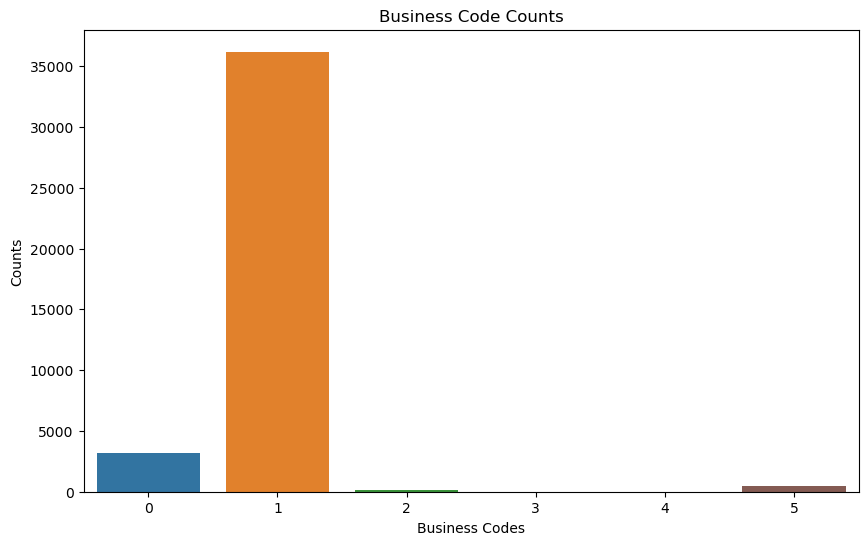

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='business_code',data=train_dataset)
plt.title('Business Code Counts')
plt.xlabel('Business Codes')
plt.ylabel('Counts')
plt.show()

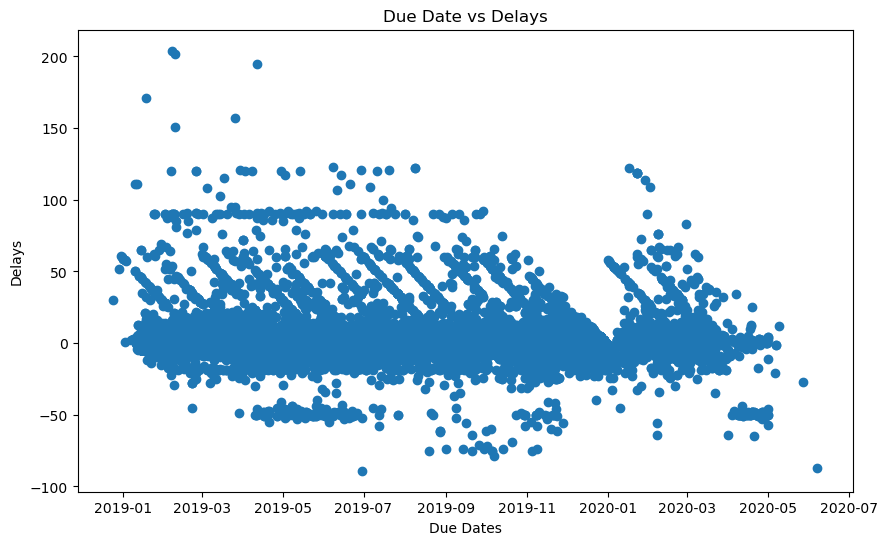

In [40]:

plt.figure(figsize=(10,6))
plt.scatter(train_dataset['due_in_date'], train_dataset['delay_days'])
plt.title('Due Date vs Delays')
plt.xlabel('Due Dates')
plt.ylabel('Delays')
plt.show()

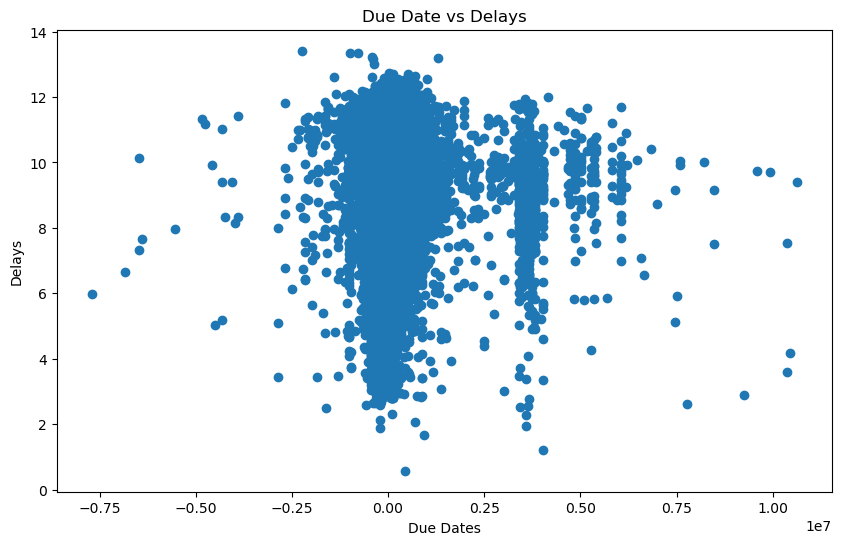

In [41]:

plt.figure(figsize=(10,6))
plt.scatter(train_dataset['average_delay'], train_dataset['total_open_amount'])
plt.title('Due Date vs Delays')
plt.xlabel('Due Dates')
plt.ylabel('Delays')
plt.show()

<Axes: title={'center': 'Box plot of Delay'}>

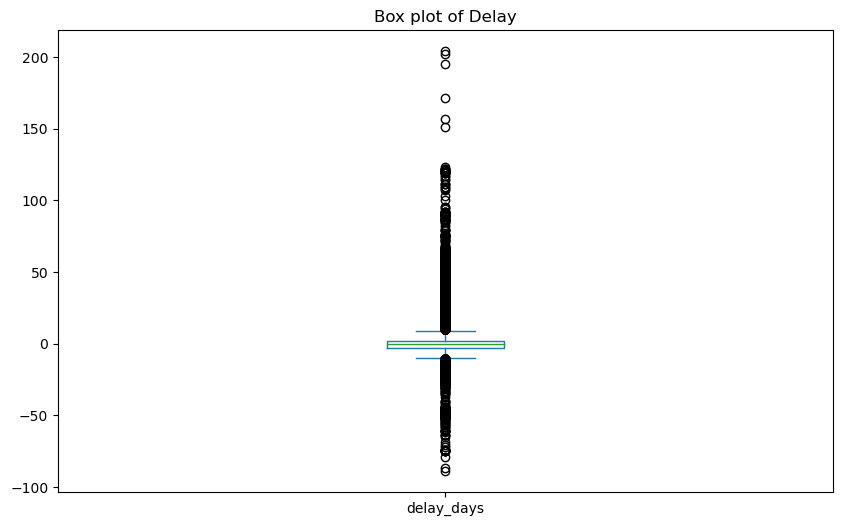

In [42]:
plt.title('Box plot of Delay')
delay_column = train_dataset['delay_days']
delay_column.plot.box(figsize=(10, 6))

<Axes: title={'center': ' Total_open_amount box plot'}>

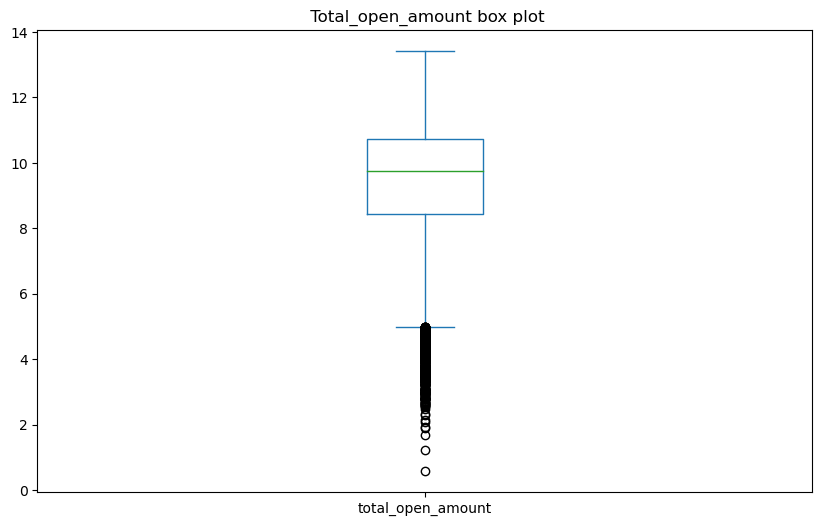

In [43]:
plt.title(' Total_open_amount box plot')
delay_column = train_dataset['total_open_amount']
delay_column.plot.box(figsize=(10, 6))

In [44]:
# fig, axes = plt.subplots(figsize=(10, 6))
  
# # plotting using plt.stem
# axes.stem(train_dataset['Delay'], train_dataset['name_customer'],
#           use_line_collection=True, basefmt=' ')
  
# # starting value of y-axis
# axes.set_ylim(0)
  
# # details and formatting of chart

# plt.xlabel('Delay')
# plt.ylabel('name_customer')
# plt.xticks(train_dataset['Delay'])

<Axes: title={'center': 'total_open_amount vs delay'}, xlabel='total_open_amount', ylabel='delay_days'>

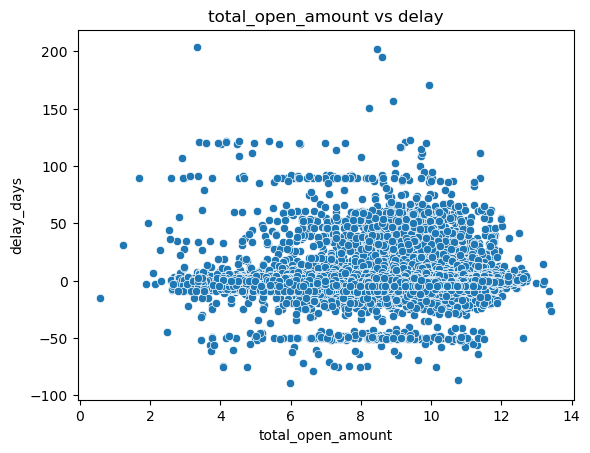

In [45]:
plt.title('total_open_amount vs delay'.format(train_dataset['total_open_amount'],train_dataset['delay_days']))
sns.scatterplot(x=train_dataset['total_open_amount'],y=train_dataset['delay_days'])

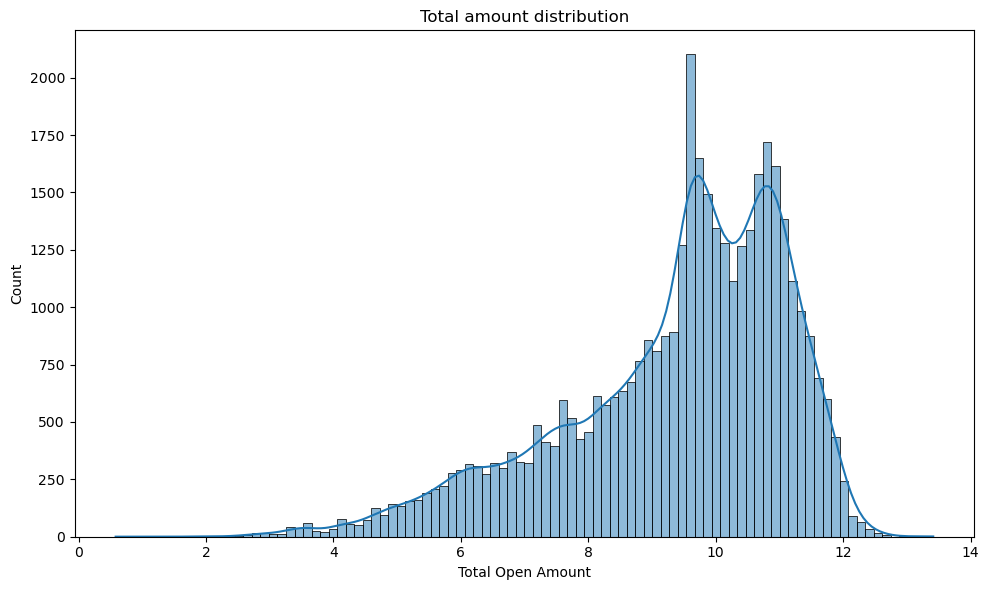

In [46]:

plt.figure(figsize=(10,6))
sns.histplot(train_dataset['total_open_amount'], kde=True)

# Set the title and labels for the chart
plt.title('Total amount distribution')
plt.xlabel('Total Open Amount')
plt.ylabel('Count')
plt.tight_layout()

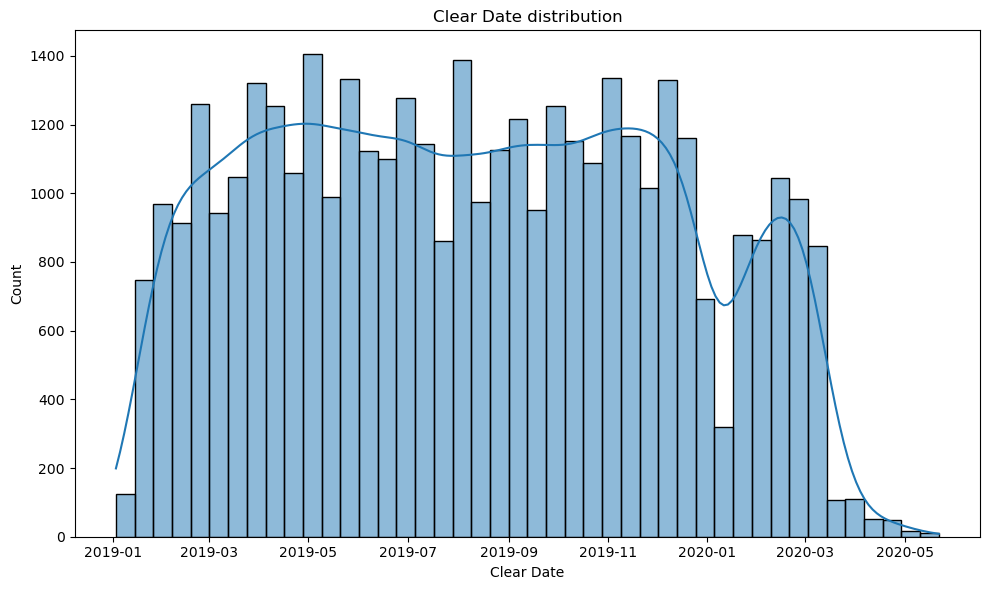

In [47]:
#Distribution  of clear date

plt.figure(figsize=(10,6))
sns.histplot(train_dataset['clear_date'], kde=True)

plt.title('Clear Date distribution')
plt.xlabel('Clear Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

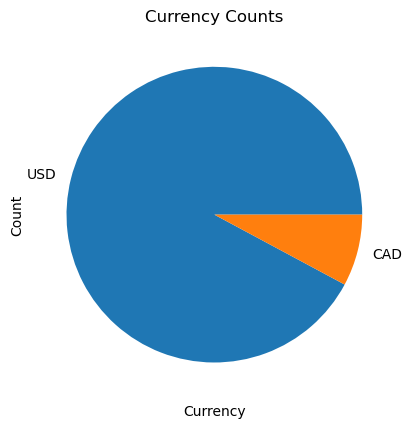

In [48]:
currency = dataset['invoice_currency']

# Call the value_counts() function on the currency column to count the number of occurrences of each currency
counts = currency.value_counts()

# Call the pie() function on the resulting series of counts to create the pie chart
plt.pie(counts, labels=counts.index)

# Set the title and labels for the chart
plt.title('Currency Counts')
plt.xlabel('Currency')
plt.ylabel('Count')

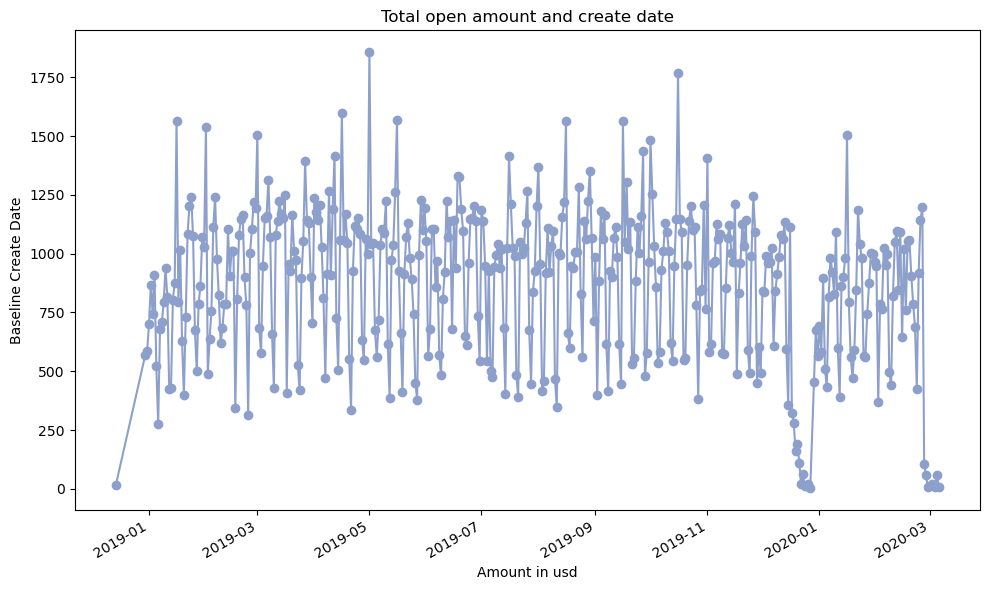

In [49]:

plt.figure(figsize=(10,6))
train_dataset['total_open_amount']=pd.to_numeric(
    train_dataset['total_open_amount'],errors='coerce')

grouped_data=train_dataset.groupby('baseline_create_date')['total_open_amount'].sum()
grouped_data.plot(kind='line',marker='o',color=sns.color_palette('Set2')[2])

plt.title('Total open amount and create date')
plt.xlabel('Amount in usd')
plt.ylabel('Baseline Create Date')
plt.tight_layout()
plt.show()

In [50]:
# sns.pairplot(train_dataset, height=3)

In [51]:
train_dataset['total_open_amount'].describe().apply(lambda x: format(x,'f'))

count    40000.000000
mean         9.380851
std          1.779119
min          0.582216
25%          8.431027
50%          9.742307
75%         10.732727
max         13.412933
Name: total_open_amount, dtype: object

In [52]:
open_amount_bins = pd.qcut(train_dataset['total_open_amount'],q=10)
open_amount_bins.value_counts()

(9.443, 9.742]      4001
(0.581, 6.698]      4000
(6.698, 7.954]      4000
(7.954, 8.828]      4000
(8.828, 9.443]      4000
(10.12, 10.56]      4000
(10.56, 10.888]     4000
(10.888, 11.283]    4000
(11.283, 13.413]    4000
(9.742, 10.12]      3999
Name: total_open_amount, dtype: int64

In [53]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(train_dataset['total_open_amount'], bins = amount_bins)

<Axes: xlabel='total_open_amount', ylabel='count'>

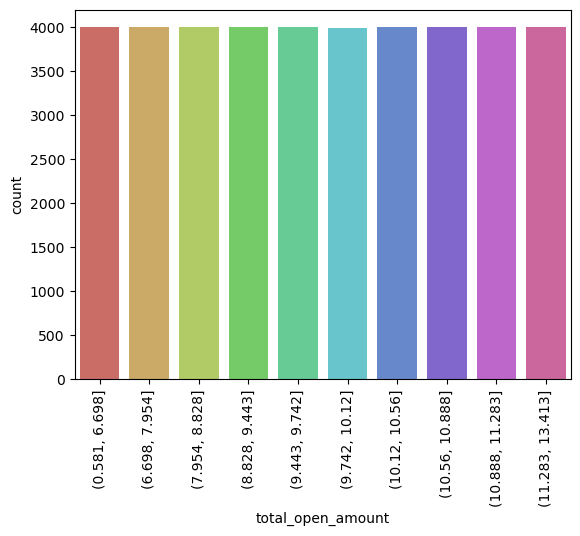

In [54]:
plt.xticks(fontsize=10, rotation=90)
sns.countplot(x=open_amount_bins, palette="hls")

In [55]:
# Relation between total_open_amount and delay
delay_bins = [0,15,30,45,60,300]
delay_bucket = pd.cut(train_dataset['delay_days'], bins = delay_bins)
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

delay_days,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 300]"
total_open_amount,,,,,
"(0, 5000]",15339,542,405,253,225


In [56]:
delay_bucket.value_counts()

(0, 15]      15339
(15, 30]       542
(30, 45]       405
(45, 60]       253
(60, 300]      225
Name: delay_days, dtype: int64

In [57]:
delay_bucket.isnull().sum()

23236

<Axes: xlabel='total_open_amount', ylabel='count'>

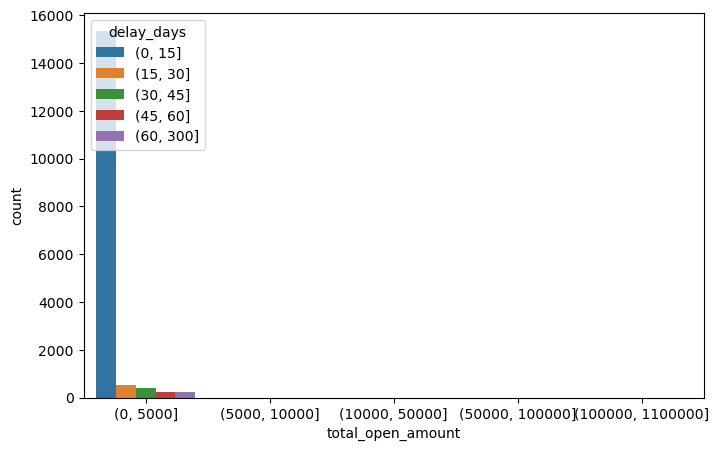

In [58]:
plt.figure(figsize=(8,5))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

<h1>FEATURE ENGINEERING<h2>

In [59]:
train_dataset.nunique()
#As here we can see that posting id has constant value and is open  column  also has  costant value so we can drop that column

business_code                 6
cust_number                1344
name_customer              3889
clear_date                  403
posting_date                424
document_create_date        427
document_create_date.1      424
due_in_date                 491
total_open_amount         35681
baseline_create_date        431
cust_payment_terms           70
delay_days                  176
Average_Delay_Seconds       893
Delay                       176
average_delay               893
dtype: int64

In [60]:
# train_dataset.drop('posting_id',axis=1,inplace=True)
# train_dataset.drop('isOpen',axis=1,inplace=True)

In [61]:
train_dataset.head(10)

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,Average_Delay_Seconds,Delay,average_delay
30418,1,1165,3649,2020-05-22,2020-01-14,2020-01-14,2020-01-14,2020-01-29,7.284272,2020-01-14,21,114,3.500308e+05,114,3.500308e+05
48219,1,448,79,2020-05-22,2020-02-14,2020-02-13,2020-02-14,2020-02-29,11.224935,2020-02-14,21,83,9.288000e+05,83,9.288000e+05
26143,1,751,395,2020-05-21,2020-01-18,2020-01-21,2020-01-18,2020-02-02,4.518849,2020-01-18,21,109,1.903304e+05,109,1.903304e+05
48581,1,751,400,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.031582,2020-01-08,21,119,1.333565e+05,119,1.333565e+05
14675,1,751,397,2020-05-21,2020-01-08,2020-01-09,2020-01-08,2020-01-23,5.659552,2020-01-08,21,119,1.309935e+05,119,1.309935e+05
5521,1,751,403,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,4.476996,2020-01-08,21,119,1.358491e+05,119,1.358491e+05
20666,1,751,394,2020-05-21,2020-01-08,2020-01-10,2020-01-08,2020-01-23,6.256153,2020-01-08,21,119,1.579034e+05,119,1.579034e+05
35152,1,1328,1358,2020-05-21,2020-01-10,2020-01-10,2020-01-10,2020-05-09,10.342613,2020-01-10,61,12,1.036800e+06,12,1.036800e+06
41586,0,390,1729,2020-05-18,2020-01-03,2020-01-03,2020-01-03,2020-01-17,4.543550,2020-01-07,5,122,2.484000e+06,122,2.484000e+06
40661,1,579,1545,2020-05-14,2020-02-19,2020-02-18,2020-02-19,2020-04-19,8.203646,2020-02-19,63,25,0.000000e+00,25,0.000000e+00


In [62]:
train_dataset.shape


(40000, 15)

In [63]:
# Calculate the IQR
def remove_outlier(dataframe,columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        # Replace the outliers with the upper and lower bounds
        dataframe[column] = dataframe[column].apply(lambda x:upper_bound if x > upper_bound
                                                                    else (lower_bound if x < lower_bound else x))
    return dataframe

<Axes: title={'center': 'Box plot of invoice Currency_usd Before removing Outliers'}>

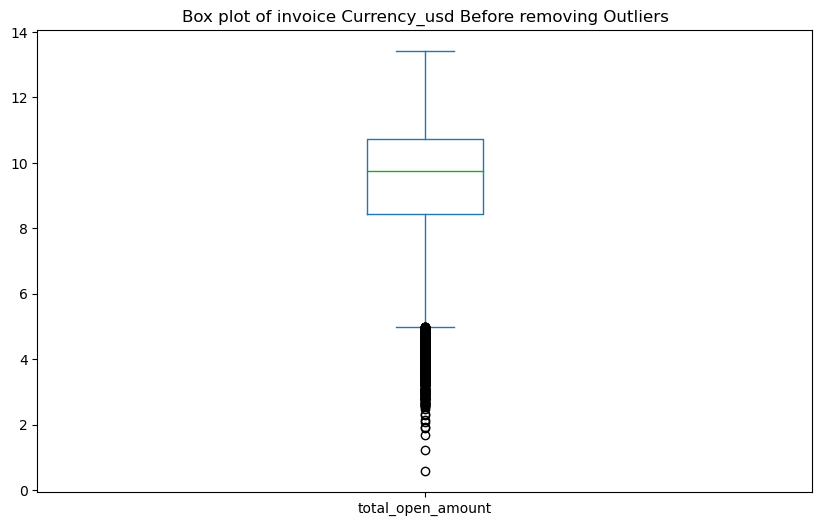

In [64]:
plt.title('Box plot of invoice Currency_usd Before removing Outliers')
delay_column = train_dataset['total_open_amount']
delay_column.plot.box(figsize=(10, 6))

In [65]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 30418 to 46777
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  int32         
 1   cust_number             40000 non-null  int32         
 2   name_customer           40000 non-null  int32         
 3   clear_date              40000 non-null  datetime64[ns]
 4   posting_date            40000 non-null  object        
 5   document_create_date    40000 non-null  datetime64[ns]
 6   document_create_date.1  40000 non-null  datetime64[ns]
 7   due_in_date             40000 non-null  datetime64[ns]
 8   total_open_amount       40000 non-null  float64       
 9   baseline_create_date    40000 non-null  datetime64[ns]
 10  cust_payment_terms      40000 non-null  int32         
 11  delay_days              40000 non-null  int64         
 12  Average_Delay_Seconds   40000 non-null  fl

<h2>Spliting  the Data <h2>

#Now before feature engineering i am splitting the data into train  and test into X and Y variable


In [66]:
train , test = train_test_split(train_dataset,test_size=0.2,shuffle=False)
y_train = train['Average_Delay_Seconds']
X_train = train.drop(columns=['Average_Delay_Seconds'])
y_test = test['Average_Delay_Seconds']
X_test = test.drop(columns=['Average_Delay_Seconds'])


In [67]:
column_for_X_outlier = ['total_open_amount']
X_train = remove_outlier(X_train,column_for_X_outlier)
X_test = remove_outlier(X_test,column_for_X_outlier)
# column_for_y_outlier = ['Average_Delay_Seconds']
# y_train = remove_outlier(y_train,column_for_y_outlier)
# y_test = remove_outlier(y_test,column_for_y_outlier)

<Axes: title={'center': 'Box plot of invoice Currency_usd after removing Outliers'}>

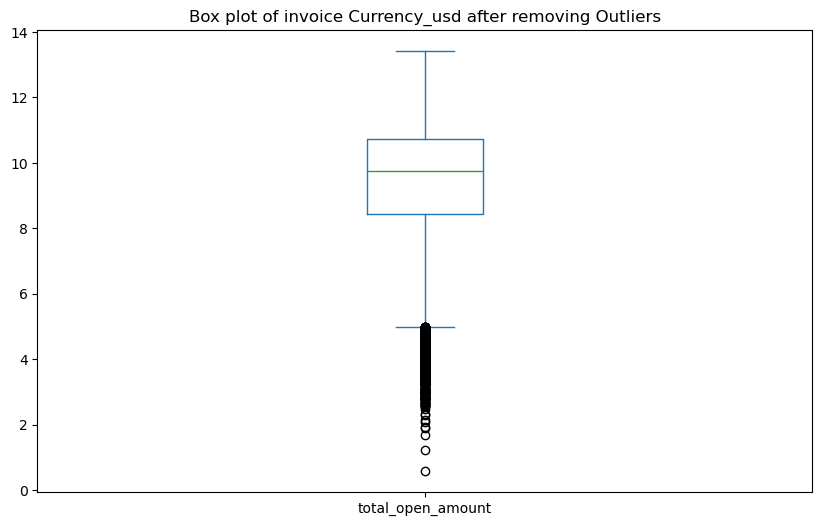

In [68]:
plt.title('Box plot of invoice Currency_usd after removing Outliers')
delay_column = train_dataset['total_open_amount']
delay_column.plot.box(figsize=(10, 6))

In [69]:
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Replace the outliers with the upper and lower bounds
y_train = y_train.apply(lambda x:upper_bound if x > upper_bound
                                                        else (lower_bound if x < lower_bound else x))

<Axes: title={'center': 'Box plot of Average_Delay_Seconds after removing Outliers'}>

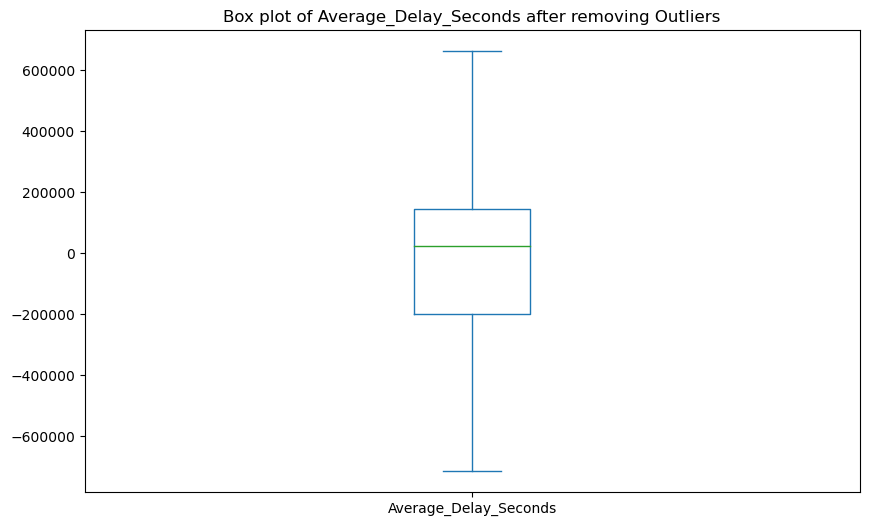

In [70]:
plt.title('Box plot of Average_Delay_Seconds after removing Outliers')
delay_column = y_train
delay_column.plot.box(figsize=(10, 6))

In [71]:
Q1 = y_test.quantile(0.25)
Q3 = y_test.quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Replace the outliers with the upper and lower bounds
y_test = y_test.apply(lambda x:upper_bound if x > upper_bound
                                                        else (lower_bound if x < lower_bound else x))

<Axes: title={'center': 'Box plot of Average_Delay_Seconds after removing Outliers'}>

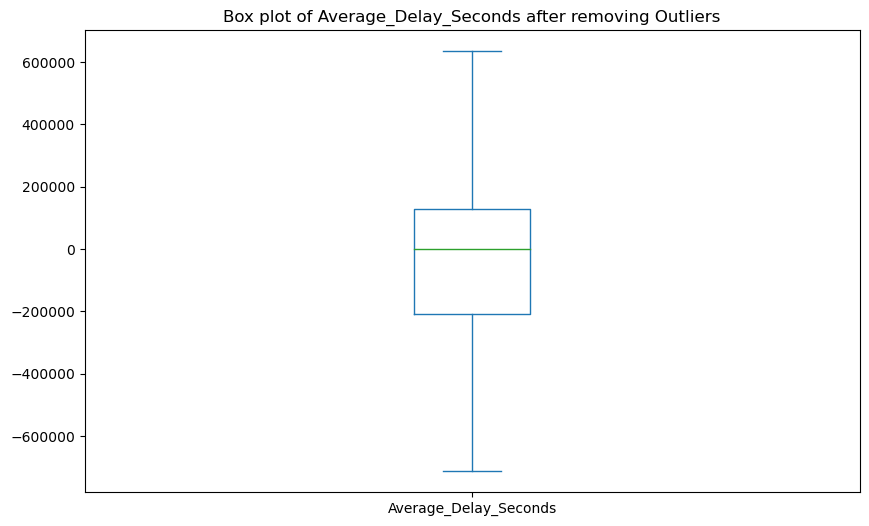

In [72]:
plt.title('Box plot of Average_Delay_Seconds after removing Outliers')
delay_column = y_test
delay_column.plot.box(figsize=(10, 6))

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 30418 to 33749
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_open_amount   32000 non-null  float64
 1   cust_payment_terms  32000 non-null  int32  
 2   business_code       32000 non-null  int32  
 3   cust_number         32000 non-null  int32  
 4   due_term            32000 non-null  int64  
dtypes: float64(1), int32(3), int64(1)
memory usage: 1.1 MB


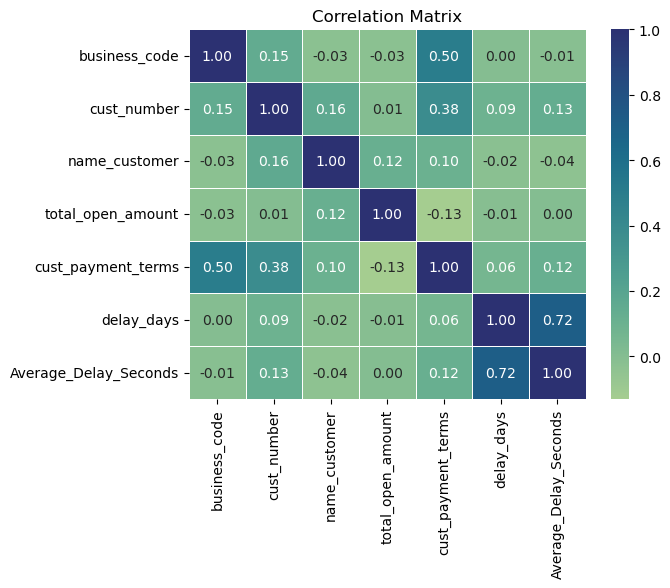

In [73]:
columns = ['business_code','cust_number','name_customer','total_open_amount','cust_payment_terms','delay_days','Average_Delay_Seconds']
numeric_columns = train[columns]
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",linewidth=.5,cmap='crest')
plt.title("Correlation Matrix")
plt.show()

In [74]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((32000, 14), (8000, 14), (32000,), (8000,))

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 30418 to 33749
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32000 non-null  int32         
 1   cust_number             32000 non-null  int32         
 2   name_customer           32000 non-null  int32         
 3   clear_date              32000 non-null  datetime64[ns]
 4   posting_date            32000 non-null  object        
 5   document_create_date    32000 non-null  datetime64[ns]
 6   document_create_date.1  32000 non-null  datetime64[ns]
 7   due_in_date             32000 non-null  datetime64[ns]
 8   total_open_amount       32000 non-null  float64       
 9   baseline_create_date    32000 non-null  datetime64[ns]
 10  cust_payment_terms      32000 non-null  int32         
 11  delay_days              32000 non-null  int64         
 12  Delay                   32000 non-null  in

In [76]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 48200 to 46777
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           8000 non-null   int32         
 1   cust_number             8000 non-null   int32         
 2   name_customer           8000 non-null   int32         
 3   clear_date              8000 non-null   datetime64[ns]
 4   posting_date            8000 non-null   object        
 5   document_create_date    8000 non-null   datetime64[ns]
 6   document_create_date.1  8000 non-null   datetime64[ns]
 7   due_in_date             8000 non-null   datetime64[ns]
 8   total_open_amount       8000 non-null   float64       
 9   baseline_create_date    8000 non-null   datetime64[ns]
 10  cust_payment_terms      8000 non-null   int32         
 11  delay_days              8000 non-null   int64         
 12  Delay                   8000 non-null   int

In [77]:
X_train['business_code'].value_counts()

1    28905
0     2573
5      416
2       96
3        6
4        4
Name: business_code, dtype: int64

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 30418 to 33749
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32000 non-null  int32         
 1   cust_number             32000 non-null  int32         
 2   name_customer           32000 non-null  int32         
 3   clear_date              32000 non-null  datetime64[ns]
 4   posting_date            32000 non-null  object        
 5   document_create_date    32000 non-null  datetime64[ns]
 6   document_create_date.1  32000 non-null  datetime64[ns]
 7   due_in_date             32000 non-null  datetime64[ns]
 8   total_open_amount       32000 non-null  float64       
 9   baseline_create_date    32000 non-null  datetime64[ns]
 10  cust_payment_terms      32000 non-null  int32         
 11  delay_days              32000 non-null  int64         
 12  Delay                   32000 non-null  in

In [79]:
# Convert 'posting_date' to datetime type
X_train['posting_date'] = pd.to_datetime(X_train['posting_date'])

# Calculate time differences in days
X_train['time_to_document_create'] = (X_train['document_create_date.1'] - X_train['posting_date']).dt.days
X_train['time_to_baseline_create'] = (X_train['baseline_create_date'] - X_train['posting_date']).dt.days

# Repeat the same steps for the 'X_test' DataFrame
X_test['posting_date'] = pd.to_datetime(X_test['posting_date'])
X_test['time_to_document_create'] = (X_test['document_create_date.1'] - X_test['posting_date']).dt.days
X_test['time_to_baseline_create'] = (X_test['baseline_create_date'] - X_test['posting_date']).dt.days



In [80]:
X_train.head(10)

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,Delay,average_delay,time_to_document_create,time_to_baseline_create
30418,1,1165,3649,2020-05-22,2020-01-14,2020-01-14,2020-01-14,2020-01-29,7.284272,2020-01-14,21,114,114,3.500308e+05,0,0
48219,1,448,79,2020-05-22,2020-02-14,2020-02-13,2020-02-14,2020-02-29,11.224935,2020-02-14,21,83,83,9.288000e+05,0,0
26143,1,751,395,2020-05-21,2020-01-18,2020-01-21,2020-01-18,2020-02-02,5.024704,2020-01-18,21,109,109,1.903304e+05,0,0
48581,1,751,400,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,5.024704,2020-01-08,21,119,119,1.333565e+05,0,0
14675,1,751,397,2020-05-21,2020-01-08,2020-01-09,2020-01-08,2020-01-23,5.659552,2020-01-08,21,119,119,1.309935e+05,0,0
5521,1,751,403,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,5.024704,2020-01-08,21,119,119,1.358491e+05,0,0
20666,1,751,394,2020-05-21,2020-01-08,2020-01-10,2020-01-08,2020-01-23,6.256153,2020-01-08,21,119,119,1.579034e+05,0,0
35152,1,1328,1358,2020-05-21,2020-01-10,2020-01-10,2020-01-10,2020-05-09,10.342613,2020-01-10,61,12,12,1.036800e+06,0,0
41586,0,390,1729,2020-05-18,2020-01-03,2020-01-03,2020-01-03,2020-01-17,5.024704,2020-01-07,5,122,122,2.484000e+06,0,4
40661,1,579,1545,2020-05-14,2020-02-19,2020-02-18,2020-02-19,2020-04-19,8.203646,2020-02-19,63,25,25,0.000000e+00,0,0


In [81]:
X_test.head(4)

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,Delay,average_delay,time_to_document_create,time_to_baseline_create
48200,1,929,2703,2019-04-11,2019-02-05,2019-02-04,2019-02-05,2019-04-11,10.756101,2019-02-05,34,0,0,-8640.000000,0,0
27329,1,856,233,2019-04-11,2019-03-26,2019-03-26,2019-03-26,2019-04-10,11.442240,2019-03-26,50,1,1,202389.041096,0,0
27985,1,850,3763,2019-04-11,2019-04-01,2019-03-30,2019-04-01,2019-04-16,10.971175,2019-04-01,35,-5,-5,-169725.266904,0,0
48978,1,802,3079,2019-04-11,2019-03-25,2019-03-25,2019-03-25,2019-05-29,10.254559,2019-03-25,34,-48,-48,-123428.571429,0,0


In [82]:
columns = ['document_create_date','posting_date','due_in_date','baseline_create_date','clear_date','document_create_date.1']
for column in columns:
    train_dataset[column] = pd.to_datetime(train_dataset[column])

In [83]:
def feature_engineering(dataframe):
    dataframe['total_amount_open_by_customer'] = dataframe.groupby(['business_code','cust_number'])['total_open_amount'].transform('sum')
    dataframe['document_create_day'] = dataframe['document_create_date'].dt.day
    dataframe['document_create_month'] = dataframe['document_create_date'].dt.month
    dataframe['document_create_year'] = dataframe['document_create_date'].dt.year
    dataframe['due_term']=pd.Series(dataframe['due_in_date'] - dataframe['baseline_create_date']).dt.days

    return dataframe

In [84]:
X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 30418 to 33749
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   business_code                  32000 non-null  int32         
 1   cust_number                    32000 non-null  int32         
 2   name_customer                  32000 non-null  int32         
 3   clear_date                     32000 non-null  datetime64[ns]
 4   posting_date                   32000 non-null  datetime64[ns]
 5   document_create_date           32000 non-null  datetime64[ns]
 6   document_create_date.1         32000 non-null  datetime64[ns]
 7   due_in_date                    32000 non-null  datetime64[ns]
 8   total_open_amount              32000 non-null  float64       
 9   baseline_create_date           32000 non-null  datetime64[ns]
 10  cust_payment_terms             32000 non-null  int32         
 11  delay_days 

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 30418 to 33749
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   business_code                  32000 non-null  int32         
 1   cust_number                    32000 non-null  int32         
 2   name_customer                  32000 non-null  int32         
 3   clear_date                     32000 non-null  datetime64[ns]
 4   posting_date                   32000 non-null  datetime64[ns]
 5   document_create_date           32000 non-null  datetime64[ns]
 6   document_create_date.1         32000 non-null  datetime64[ns]
 7   due_in_date                    32000 non-null  datetime64[ns]
 8   total_open_amount              32000 non-null  float64       
 9   baseline_create_date           32000 non-null  datetime64[ns]
 10  cust_payment_terms             32000 non-null  int32         
 11  delay_days 

In [87]:
X_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,...,delay_days,Delay,average_delay,time_to_document_create,time_to_baseline_create,total_amount_open_by_customer,document_create_day,document_create_month,document_create_year,due_term
30418,1,1165,3649,2020-05-22,2020-01-14,2020-01-14,2020-01-14,2020-01-29,7.284272,2020-01-14,...,114,114,3.500308e+05,0,0,14.573364,14,1,2020,15
48219,1,448,79,2020-05-22,2020-02-14,2020-02-13,2020-02-14,2020-02-29,11.224935,2020-02-14,...,83,83,9.288000e+05,0,0,120.768130,13,2,2020,15
26143,1,751,395,2020-05-21,2020-01-18,2020-01-21,2020-01-18,2020-02-02,5.024704,2020-01-18,...,109,109,1.903304e+05,0,0,7629.342541,21,1,2020,15
48581,1,751,400,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,5.024704,2020-01-08,...,119,119,1.333565e+05,0,0,7629.342541,8,1,2020,15
14675,1,751,397,2020-05-21,2020-01-08,2020-01-09,2020-01-08,2020-01-23,5.659552,2020-01-08,...,119,119,1.309935e+05,0,0,7629.342541,9,1,2020,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,1,850,3771,2019-04-11,2019-03-31,2019-03-30,2019-03-31,2019-04-15,7.718828,2019-03-31,...,-4,-4,-1.989231e+05,0,0,64819.110322,30,3,2019,15
33026,0,156,2078,2019-04-11,2019-03-19,2019-03-19,2019-03-19,2019-03-30,8.166807,2019-03-20,...,12,12,1.036800e+06,0,1,8.166807,19,3,2019,10
5743,1,850,3763,2019-04-11,2019-03-31,2019-03-30,2019-03-31,2019-04-15,9.628871,2019-03-31,...,-4,-4,-1.697253e+05,0,0,64819.110322,30,3,2019,15
27337,1,924,779,2019-04-11,2019-03-28,2019-03-27,2019-03-28,2019-04-12,7.596528,2019-03-28,...,-1,-1,-6.624000e+04,0,0,6714.581549,27,3,2019,15


In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 30418 to 33749
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   business_code                  32000 non-null  int32         
 1   cust_number                    32000 non-null  int32         
 2   name_customer                  32000 non-null  int32         
 3   clear_date                     32000 non-null  datetime64[ns]
 4   posting_date                   32000 non-null  datetime64[ns]
 5   document_create_date           32000 non-null  datetime64[ns]
 6   document_create_date.1         32000 non-null  datetime64[ns]
 7   due_in_date                    32000 non-null  datetime64[ns]
 8   total_open_amount              32000 non-null  float64       
 9   baseline_create_date           32000 non-null  datetime64[ns]
 10  cust_payment_terms             32000 non-null  int32         
 11  delay_days 

In [89]:
df_for_corr = train.copy()
df_for_corr.drop(columns=['posting_date'],inplace=True)

In [90]:
correlation =df_for_corr.corr()['Average_Delay_Seconds'].sort_values(ascending=False)
print(correlation)

Average_Delay_Seconds    1.000000
average_delay            1.000000
delay_days               0.715088
Delay                    0.715088
cust_number              0.134235
cust_payment_terms       0.117345
total_open_amount        0.003424
business_code           -0.012355
name_customer           -0.035616
Name: Average_Delay_Seconds, dtype: float64


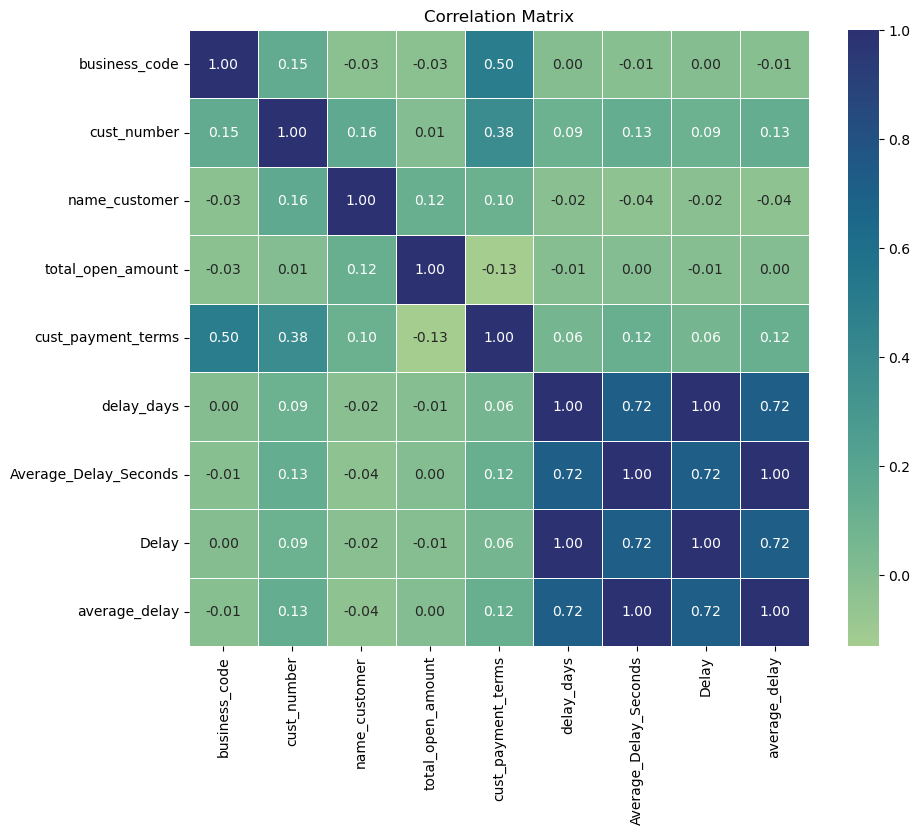

In [91]:
numeric_columns = df_for_corr.select_dtypes(include='number')
# numeric_columns = train[columns]
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",linewidth=.5,cmap='crest')
plt.title("Correlation Matrix")
plt.show()

In [92]:
from sklearn.feature_selection import SelectKBest , f_regression
X = X_train
y = y_train

non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
X = X.drop(columns=non_numeric_cols)

k = 10
selector = SelectKBest(score_func=f_regression,k=k)
X_selected = selector.fit_transform(X,y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
feature_scores = selector.scores_

feature_scores_df = pd.DataFrame({'Feature':X.columns,'Score':feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score',ascending=False)

print(feature_scores_df.head(k))

selected_feature_scores = selector.scores_[selected_feature_indices]
print(selected_feature_indices)

                          Feature         Score
7                   average_delay  33245.883939
5                      delay_days  11089.764058
6                           Delay  11089.764058
10  total_amount_open_by_customer   5712.099156
9         time_to_baseline_create   2481.148267
4              cust_payment_terms    978.392794
0                   business_code    359.544233
3               total_open_amount    168.669698
2                   name_customer    122.948873
12          document_create_month     46.771948
[ 0  2  3  4  5  6  7  9 10 12]


In [93]:
X_train.head(5)

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,...,delay_days,Delay,average_delay,time_to_document_create,time_to_baseline_create,total_amount_open_by_customer,document_create_day,document_create_month,document_create_year,due_term
30418,1,1165,3649,2020-05-22,2020-01-14,2020-01-14,2020-01-14,2020-01-29,7.284272,2020-01-14,...,114,114,350030.769231,0,0,14.573364,14,1,2020,15
48219,1,448,79,2020-05-22,2020-02-14,2020-02-13,2020-02-14,2020-02-29,11.224935,2020-02-14,...,83,83,928800.000000,0,0,120.768130,13,2,2020,15
26143,1,751,395,2020-05-21,2020-01-18,2020-01-21,2020-01-18,2020-02-02,5.024704,2020-01-18,...,109,109,190330.434783,0,0,7629.342541,21,1,2020,15
48581,1,751,400,2020-05-21,2020-01-08,2020-01-08,2020-01-08,2020-01-23,5.024704,2020-01-08,...,119,119,133356.521739,0,0,7629.342541,8,1,2020,15
14675,1,751,397,2020-05-21,2020-01-08,2020-01-09,2020-01-08,2020-01-23,5.659552,2020-01-08,...,119,119,130993.548387,0,0,7629.342541,9,1,2020,15


<H1>Model Selection & Evaluation<h1>

In [94]:
selected_columns = ['total_open_amount','cust_payment_terms','business_code',
                    'cust_number','due_term']
X_train = X_train[selected_columns].copy()
X_test = X_test[selected_columns].copy() 

<h3>As this is a regression model we will use the following models:-<br>
- Linear Regressor<br>
- ADABOOST<br>
- Decision Tree<br>
- Random Forest<br>
- XgBoost<br>
<h1>

In [95]:
from sklearn.metrics import mean_squared_error , mean_absolute_error, median_absolute_error , r2_score
import xgboost as xgb
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

XGBOOST

In [96]:
#fitting the model 

clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)

# Predicting the Validation Set Results
y_pred = clf.predict(X_test)
# predicting all types of error and accuracy
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
medae = median_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error =",mae)
print("Mean squared error =", mse) 
print("Median absolute error =",medae) 
print("R2 score =", r2)
print("R2 score =", r2_score(y_train,clf.predict(X_train)))
print("Accuracy= ", clf.score(X_test,y_test))


Mean absolute error = 77595.17002652076
Mean squared error = 19555097277.90938
Median absolute error = 34461.60966981134
R2 score = 0.742912488074968
R2 score = 0.8282284831710046
Accuracy=  0.742912488074968


Linear Regression

In [97]:
Linear_regressor = LinearRegression()
Linear_regressor.fit(X_train, y_train)
y_pred= Linear_regressor.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
medae = median_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error =",mae)
print("Mean squared error =", mse) 
print("Median absolute error =",medae) 
print("R2 score =", r2)

print("Accuracy= ", Linear_regressor.score(X_test,y_test))


print(r2)

Mean absolute error = 201067.60846594654
Mean squared error = 70490669740.80159
Median absolute error = 165691.16580675967
R2 score = 0.07327124789791584
Accuracy=  0.07327124789791584
0.07327124789791584


<h5>Random Forest<h5>

In [98]:
rfRegressor = RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_split=5,random_state=42)
rfRegressor.fit(X_train, y_train)
y_pred= rfRegressor.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
medae = median_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error =",mae)
print("Mean squared error =", mse) 
print("Median absolute error =",medae) 
print("R2 score =", r2)
print("R2 score =", r2_score(y_train,rfRegressor.predict(X_train)))
print("Accuracy= ", rfRegressor.score(X_test,y_test))


print(r2)

Mean absolute error = 105478.84564180583
Mean squared error = 34087164336.771984
Median absolute error = 43258.50296075917
R2 score = 0.551861893429697
R2 score = 0.5688259926874177
Accuracy=  0.551861893429697
0.551861893429697


Decision Tree Regression

In [99]:
DecisionTreeRegressor()
dfRegressor =DecisionTreeRegressor(ccp_alpha=600e+5,random_state=42)
dfRegressor.fit(X_train, y_train)
y_pred= dfRegressor.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
medae = median_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error =",mae)
print("Mean squared error =", mse) 
print("Median absolute error =",medae) 
print("R2 score =", r2)
print("Accuracy= ", dfRegressor.score(X_test,y_test))


print(r2)

Mean absolute error = 86703.09247480238
Mean squared error = 25019033617.56567
Median absolute error = 34115.802251530964
R2 score = 0.6710790536043634
Accuracy=  0.6710790536043634
0.6710790536043634


ADABOOST

In [100]:
from sklearn.ensemble import AdaBoostRegressor
ada_regressor = AdaBoostRegressor()
ada_regressor.fit(X_train,y_train)
y_pred= ada_regressor.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
medae = median_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error =",mae)
print("Mean squared error =", mse) 
print("Median absolute error =",medae) 
print("R2 score =", r2)
print("Accuracy= ",ada_regressor.score(X_test,y_test))


print(r2)

Mean absolute error = 170589.9293021416
Mean squared error = 49432144795.971466
Median absolute error = 139306.4537686013
R2 score = 0.350124065653696
Accuracy=  0.350124065653696
0.350124065653696


In [101]:
model_names = ['Linear Regression','Descision Tree','Random Forest','Adaboost','Xgboost','Catboost']
models = [Linear_regressor,dfRegressor,rfRegressor,ada_regressor,clf]

eval_metrics = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'MedAE': [],
    'R2': [],
    'Train_R2': []
}

for model_name , model in zip(model_names,models):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    medae = median_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    train_r2  = r2_score(y_train,model.predict(X_train))

    eval_metrics['Model'].append(model_name)
    eval_metrics['MSE'].append(mse)
    eval_metrics['MAE'].append(mae)
    eval_metrics['RMSE'].append(rmse)
    eval_metrics['MedAE'].append(medae)
    eval_metrics['R2'].append(r2)
    eval_metrics['Train_R2'].append(train_r2)

metrics_df = pd.DataFrame(eval_metrics)

metrics_df

,Model,MSE,MAE,RMSE,MedAE,R2,Train_R2
0,Linear Regression,7.049067e+10,201067.608466,265500.790471,165691.165807,0.073271,0.042770
1,Descision Tree,2.501903e+10,86703.092475,158174.061140,34115.802252,0.671079,0.704226
2,Random Forest,3.408716e+10,105478.845642,184627.095348,43258.502961,0.551862,0.568826
3,Adaboost,4.943214e+10,170589.929302,222333.409086,139306.453769,0.350124,0.377852
4,Xgboost,1.955510e+10,77595.170027,139839.541182,34461.609670,0.742912,0.828228


contuning  with XgBoost as it gives us the best result from all the other models.

### HYPER-PARAMETER TUNING

In [102]:
from sklearn.model_selection import GridSearchCV

#selecting those parameters which are present in xgb classifier
#xgboost.XGBClassifier()
# Define the parameter grid
#list of  grid sea

param_grid = {
    'n_estimators': [600,700],
    'learning_rate': [0.01,0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.01,0.1]
}



# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xgb_predictions = best_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)

print("Best Hyperparameters:",best_params)
print("XGBoost - MSE:",xgb_mse,"R2:",xgb_r2,"RMSE:",xgb_rmse)

Best Hyperparameters: {'colsample_bytree': 0.01, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 700, 'subsample': 1.0}
XGBoost - MSE: 22805488908.164967 R2: 0.7001801464696751 RMSE: 151014.86320281512


In [103]:
#fitting the model 

clf_hyper = xgb.XGBRegressor(colsample_bytree =0.07,learning_rate= 0.4,max_depth=4,n_estimators=700,subsample=1,num_leaves=31)
clf_hyper.fit(X_train, y_train)

# Predicting the Validation Set Results
y_pred = clf_hyper.predict(X_test)
# predicting all types of error and accuracy
y_pred = clf_hyper.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
medae = median_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error =",mae)
print("Mean squared error =", mse) 
print("Median absolute error =",medae) 
print("R2 score =", r2)
print("R2 score =", r2_score(y_train,clf.predict(X_train)))
print("Accuracy= ", clf_hyper.score(X_test,y_test))


[19:42:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.

Mean absolute error = 79701.3569826487
Mean squared error = 19590726085.531616
Median absolute error = 37912.24665178571
R2 score = 0.7424440822483805
R2 score = 0.8282284831710046
Accuracy=  0.7424440822483805


In [104]:
selected_columns = ['total_open_amount','cust_payment_terms','business_code',
                    'cust_number','due_term']
train_dataset =X_train[selected_columns].copy()
untouched = X_train[selected_columns].copy()

In [105]:
train_dataset.shape

(32000, 5)

In [106]:
untouched.shape

(32000, 5)

In [107]:
untouched['avg_delay_seconds']=clf.predict(untouched)

In [108]:
untouched['avg_delay_days']=untouched['avg_delay_seconds']/86400
def label_aging_bucket(x):
    if x<=15:
        return '0-15'
    if x<=30:
        return '16-30'
    elif x<=60:
        return '46-60'
    else:
        return 'Greater than 60'
untouched['aging-bucket']=untouched['avg_delay_days'].apply(label_aging_bucket)

In [109]:
untouched

,total_open_amount,cust_payment_terms,business_code,cust_number,due_term,avg_delay_seconds,avg_delay_days,aging-bucket
30418,7.284272,21,1,1165,15,110859.304688,1.283094,0-15
48219,11.224935,21,1,448,15,65537.539062,0.758536,0-15
26143,5.024704,21,1,751,15,115553.851562,1.337429,0-15
48581,5.024704,21,1,751,15,115553.851562,1.337429,0-15
14675,5.659552,21,1,751,15,117026.859375,1.354478,0-15
...,...,...,...,...,...,...,...,...
6651,7.718828,35,1,850,15,-192263.359375,-2.225270,0-15
33026,8.166807,5,0,156,10,268512.968750,3.107789,0-15
5743,9.628871,35,1,850,15,-203967.781250,-2.360738,0-15
27337,7.596528,23,1,924,15,-38644.929688,-0.447279,0-15
